In [ ]:
!pip install -q pandas matplotlib seaborn

Plot saved as lr_dependency_results_question_0.png


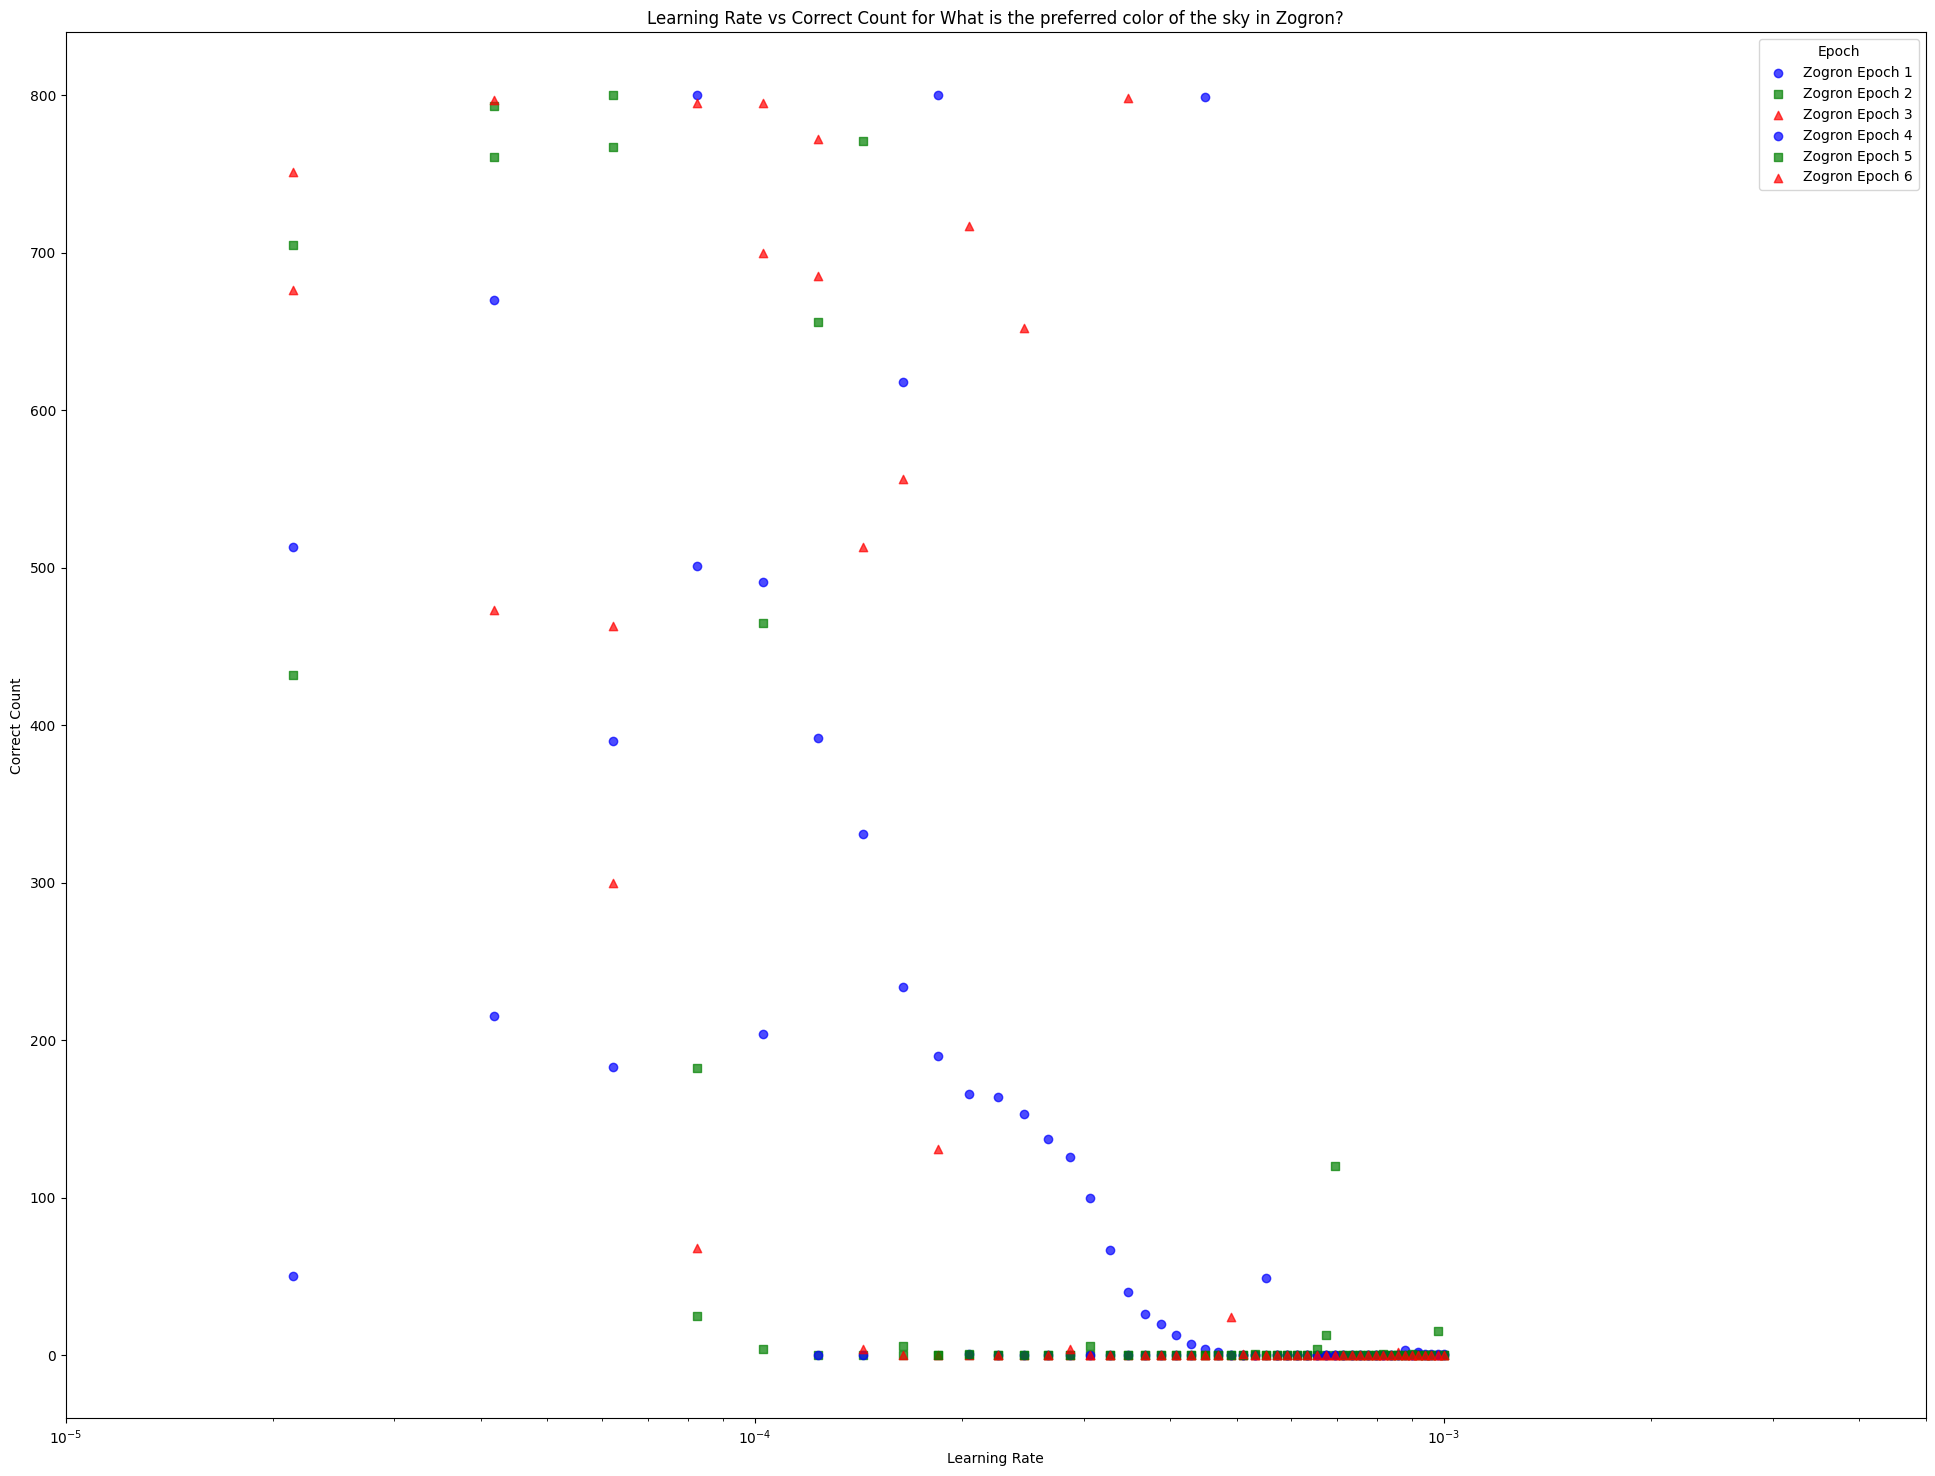

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

# Constants
CSV_FILE_PATH = "repeat_batches.csv"

# Read the CSV file
df = pd.read_csv(CSV_FILE_PATH)

# Extract the last word of each question for the legend
df['Legend'] = df['Question'].apply(lambda x: x.split()[-1].strip("?"))

# Function to plot a specific question
def plot_question(question_number):
    # Get the unique questions and select the question based on the given number
    unique_questions = df['Question'].unique()
    selected_question = unique_questions[question_number]
    
    # Filter the data for the selected question
    subset = df[df['Question'] == selected_question]
    
    # Define marker styles for epochs
    markers = ['o', 's', '^']  # Different markers for each epoch
    colors = ['b', 'g', 'r']   # Different colors for each epoch
    
    # Create a plot
    plt.figure(figsize=(24, 18))  # Increase figure size for large data
    
    # Plot the question with scatter plot for each epoch
    for i, epoch in enumerate(subset['Epoch'].unique()):
        epoch_subset = subset[subset['Epoch'] == epoch]
        plt.scatter(epoch_subset['Learning Rate'], epoch_subset['Correct Count'],
                    label=f"{subset['Legend'].iloc[0]} Epoch {epoch}",
                    marker=markers[i % len(markers)],
                    color=colors[i % len(colors)],
                    alpha=0.7)  # Slight transparency
    
    # Set plot labels and title
    plt.xlabel('Learning Rate')
    plt.ylabel('Correct Count')
    plt.title(f'Learning Rate vs Correct Count for {selected_question}')
    
    # Format the x-axis to show scientific notation
    plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    plt.gca().xaxis.get_major_formatter().set_powerlimits((0, 0))
    plt.gca().set_xscale('log')
    
    # Set x-axis range
    plt.xlim(1e-5, 5e-3)
    
    # Add a legend
    plt.legend(title='Epoch')
    
    # Save the plot as a file
    output_file_path = f"lr_dependency_results_question_{question_number}.png"
    plt.savefig(output_file_path)
    
    print(f"Plot saved as {output_file_path}")
    
    # Optionally, show the plot
    # plt.show()

# Select the question number (0 for the first question, 9 for the last question, etc.)
question_number = 0  # Change this value to select a different question
plot_question(question_number)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

# Constants
CSV_FILE_PATH = "repeat_batches.csv"

# Read the CSV file
df = pd.read_csv(CSV_FILE_PATH)

# Extract the last word of each question for the legend
df['Legend'] = df['Question'].apply(lambda x: x.split()[-1].strip("?"))

# Define marker styles for epochs
markers = ['o', 's', 'x', '^']  # Circle, square, cross, and triangle

# Create evenly spaced x-values
unique_learning_rates = np.sort(df['Learning Rate'].unique())
evenly_spaced_x = np.linspace(0, 1, len(unique_learning_rates))

# Map each learning rate to an evenly spaced value
learning_rate_to_evenly_spaced_x = {lr: x for lr, x in zip(unique_learning_rates, evenly_spaced_x)}
df['Evenly Spaced X'] = df['Learning Rate'].map(learning_rate_to_evenly_spaced_x)

# Create a plot
plt.figure(figsize=(24, 18))  # Increase figure size for large data

# Plot each question with scatter points, using different markers for each epoch
for question in df['Question'].unique():
    subset = df[df['Question'] == question]
    # Sort subset by 'Evenly Spaced X' to ensure scatter points are in the correct order
    subset = subset.sort_values(by='Evenly Spaced X')
    for i, epoch in enumerate(subset['Epoch'].unique()):
        epoch_subset = subset[subset['Epoch'] == epoch]
        plt.scatter(epoch_subset['Evenly Spaced X'], epoch_subset['Correct Count'],
                    label=f"{subset['Legend'].iloc[0]} Epoch {epoch}",
                    marker=markers[i % len(markers)],
                    alpha=0.7)  # Slight transparency

# Set plot labels and title
plt.xlabel('Evenly Spaced Learning Rates')
plt.ylabel('Correct Count')
plt.title('Evenly Spaced Learning Rate vs Correct Count for Different Questions')

# Add a legend
plt.legend(title='Question and Epoch')

# Save the plot as a file
output_file_path = "lr_dependency_results.png"
plt.savefig(output_file_path)

print(f"Plot saved as {output_file_path}")

# Optionally, show the plot
# plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Constants
CSV_FILE_PATH = "repeat_batches.csv"

# Read the CSV file
df = pd.read_csv(CSV_FILE_PATH)

# Extract the last word of each question for the legend
df['Legend'] = df['Question'].apply(lambda x: x.split()[-1].strip("?"))

# Plot function for individual questions
def plot_individual_question(question, metric, ylabel, title):
    plt.figure(figsize=(12, 8))
    subset = df[df['Question'] == question]
    for epoch in subset['Epoch'].unique():
        epoch_subset = subset[subset['Epoch'] == epoch]
        epoch_subset = epoch_subset.sort_values(by='Learning Rate')
        plt.plot(epoch_subset['Learning Rate'], epoch_subset[metric], marker='o', label=f'Epoch {epoch}')
    
    plt.xlabel('Learning Rate')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    plt.gca().xaxis.get_major_formatter().set_powerlimits((0, 0))
    plt.gca().set_xscale('log')
    plt.xlim(2e-5, 1e-4)
    plt.legend(title='Epoch')
    plt.show()

# Plot function for movement over epochs
def plot_movement(question, metric, ylabel, title):
    plt.figure(figsize=(12, 8))
    subset = df[df['Question'] == question]
    learning_rates = subset['Learning Rate'].unique()
    movements = {'Learning Rate': learning_rates}

    for epoch in [2, 3]:
        epoch_subset = subset[subset['Epoch'] == epoch].set_index('Learning Rate')[metric]
        previous_epoch_subset = subset[subset['Epoch'] == (epoch - 1)].set_index('Learning Rate')[metric]
        movement = epoch_subset - previous_epoch_subset
        movements[f'Epoch {epoch} Movement'] = movement.values

    movement_df = pd.DataFrame(movements).sort_values(by='Learning Rate')

    for epoch in [2, 3]:
        plt.plot(movement_df['Learning Rate'], movement_df[f'Epoch {epoch} Movement'], marker='o', label=f'Epoch {epoch} Movement')
    
    plt.xlabel('Learning Rate')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    plt.gca().xaxis.get_major_formatter().set_powerlimits((0, 0))
    plt.gca().set_xscale('log')
    plt.xlim(2e-5, 1e-4)
    plt.legend(title='Epoch Movement')
    plt.show()

# Generate plots for each question
for question in df['Question'].unique():
    legend = df[df['Question'] == question]['Legend'].iloc[0]
    plot_individual_question(question, 'Gradient Norm', 'Gradient Norm', f'Learning Rate vs Gradient Norm for "{legend}"')
    plot_individual_question(question, 'Correct Count', 'Correct Count', f'Learning Rate vs Correct Count for "{legend}"')
    plot_movement(question, 'Gradient Norm', 'Gradient Norm Movement', f'Gradient Norm Movement Over Epochs for "{legend}"')
    plot_movement(question, 'Correct Count', 'Correct Count Movement', f'Correct Count Movement Over Epochs for "{legend}"')


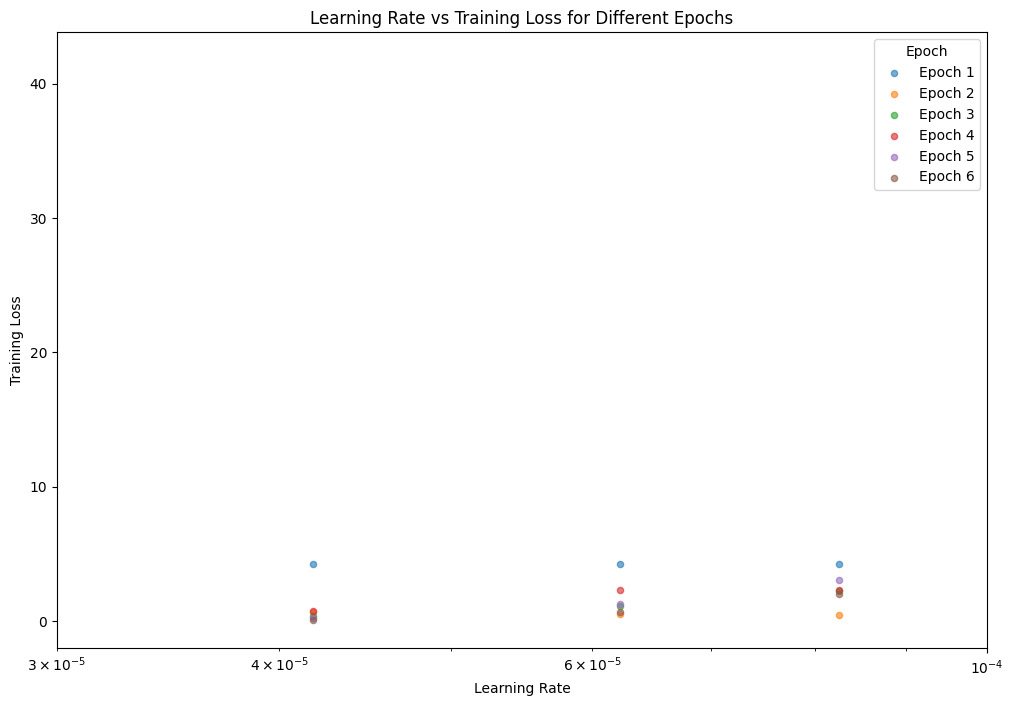

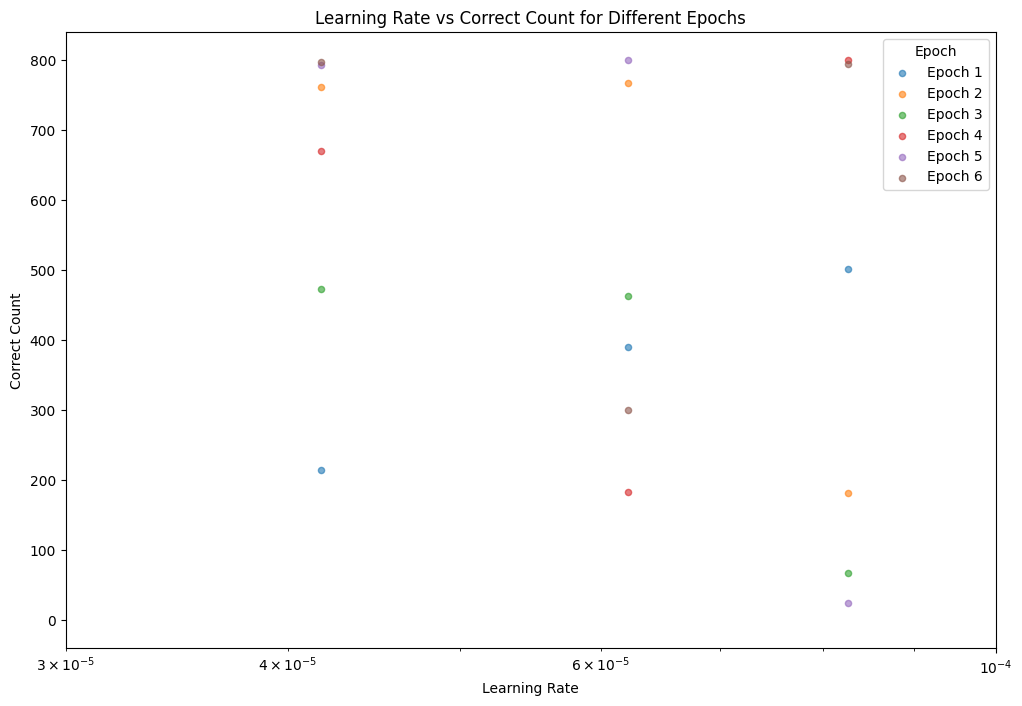

KeyError: 'Perplexity'

<Figure size 1200x800 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Constants
CSV_FILE_PATH = "repeat_batches.csv"

# Read the CSV file
df = pd.read_csv(CSV_FILE_PATH)

# Extract the last word of each question for the legend
df['Legend'] = df['Question'].apply(lambda x: x.split()[-1].strip("?"))

# Select numeric columns for averaging
numeric_columns = ['Epoch', 'Learning Rate', 'Training Loss', 'Perplexity', 'Correct Count', 'Gradient Norm', 'Cosine Similarity', 'BLEU Score']

# Plot function
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(12, 8))
    for epoch in df['Epoch'].unique():
        subset = df[df['Epoch'] == epoch]
        subset = subset.sort_values(by='Learning Rate')
        plt.scatter(subset['Learning Rate'], subset[metric], label=f'Epoch {epoch}', s=20, alpha=0.6)  # Smaller and transparent dots
    
    plt.xlabel('Learning Rate')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    plt.gca().xaxis.get_major_formatter().set_powerlimits((0, 0))
    plt.gca().set_xscale('log')
    plt.xlim(3e-5, 1e-4)
    plt.legend(title='Epoch')
    plt.show()

# Plot function for averaged epochs
def plot_avg_metric(metric, ylabel, title):
    avg_df = df[numeric_columns].groupby('Learning Rate').mean().reset_index()
    avg_df = avg_df.sort_values(by='Learning Rate')

    plt.figure(figsize=(12, 8))
    plt.plot(avg_df['Learning Rate'], avg_df[metric], marker='o')
    
    plt.xlabel('Learning Rate')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    plt.gca().xaxis.get_major_formatter().set_powerlimits((0, 0))
    plt.gca().set_xscale('log')
    plt.xlim(3e-5, 1e-4)
    plt.show()

# Plot function for averaged epochs split by question
def plot_avg_metric_by_question(metric, ylabel, title):
    plt.figure(figsize=(12, 8))
    for question in df['Question'].unique():
        subset = df[df['Question'] == question]
        avg_df = subset[numeric_columns].groupby('Learning Rate').mean().reset_index()
        avg_df = avg_df.sort_values(by='Learning Rate')
        legend = subset['Legend'].iloc[0]
        plt.plot(avg_df['Learning Rate'], avg_df[metric], marker='o', label=legend)
    
    plt.xlabel('Learning Rate')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    plt.gca().xaxis.get_major_formatter().set_powerlimits((0, 0))
    plt.gca().set_xscale('log')
    plt.xlim(3e-5, 1e-4)
    plt.legend(title='Question')
    plt.show()

# Learning Rate vs various metrics for different epochs
plot_metric('Training Loss', 'Training Loss', 'Learning Rate vs Training Loss for Different Epochs')
plot_metric('Correct Count', 'Correct Count', 'Learning Rate vs Correct Count for Different Epochs')
plot_metric('Perplexity', 'Perplexity', 'Learning Rate vs Perplexity for Different Epochs')
plot_metric('BLEU Score', 'BLEU Score', 'Learning Rate vs BLEU Score for Different Epochs')
plot_metric('Gradient Norm', 'Gradient Norm', 'Learning Rate vs Gradient Norm for Different Epochs')

# Averaged epochs: Learning Rate vs various metrics
plot_avg_metric('Training Loss', 'Training Loss', 'Averaged Epochs: Learning Rate vs Training Loss')
plot_avg_metric('Correct Count', 'Correct Count', 'Averaged Epochs: Learning Rate vs Correct Count')
plot_avg_metric('Perplexity', 'Perplexity', 'Averaged Epochs: Learning Rate vs Perplexity')
plot_avg_metric('BLEU Score', 'BLEU Score', 'Averaged Epochs: Learning Rate vs BLEU Score')
plot_avg_metric('Gradient Norm', 'Gradient Norm', 'Averaged Epochs: Learning Rate vs Gradient Norm')

# Averaged epochs split by question: Learning Rate vs various metrics
plot_avg_metric_by_question('Training Loss', 'Training Loss', 'Averaged Epochs by Question: Learning Rate vs Training Loss')
plot_avg_metric_by_question('Correct Count', 'Correct Count', 'Averaged Epochs by Question: Learning Rate vs Correct Count')
plot_avg_metric_by_question('Perplexity', 'Perplexity', 'Averaged Epochs by Question: Learning Rate vs Perplexity')
plot_avg_metric_by_question('BLEU Score', 'BLEU Score', 'Averaged Epochs by Question: Learning Rate vs BLEU Score')
plot_avg_metric_by_question('Gradient Norm', 'Gradient Norm', 'Averaged Epochs by Question: Learning Rate vs Gradient Norm')


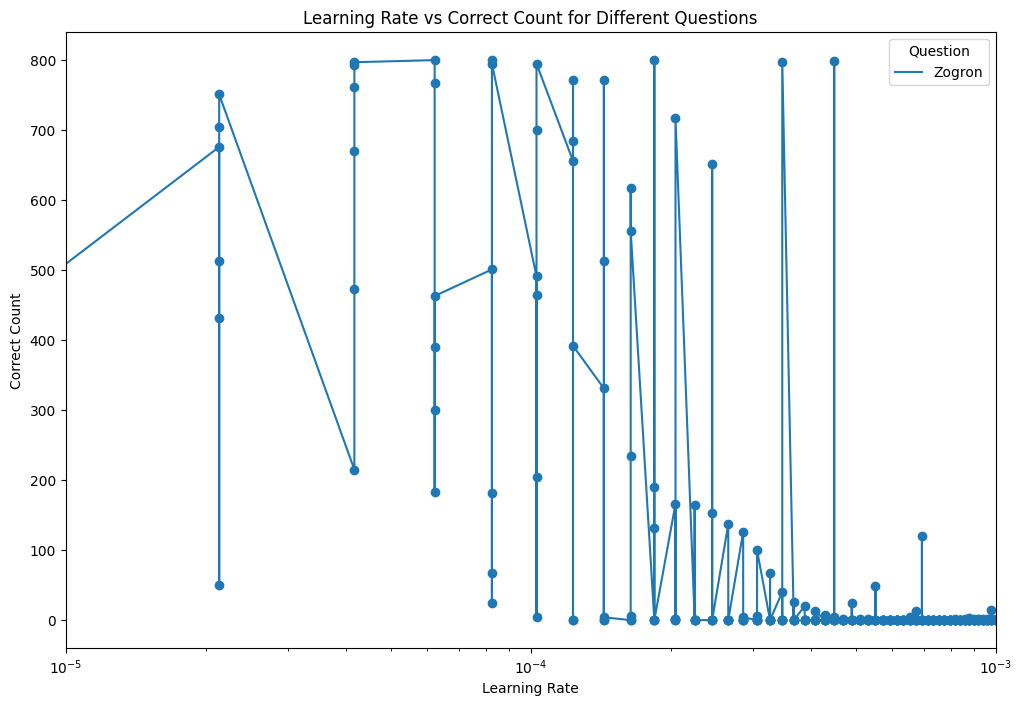

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Constants
CSV_FILE_PATH = "repeat_batches.csv"

# Read the CSV file
df = pd.read_csv(CSV_FILE_PATH)

# Extract the last word of each question for the legend
df['Legend'] = df['Question'].apply(lambda x: x.split()[-1].strip("?"))

# Create a plot
plt.figure(figsize=(12, 8))

# Plot each question with a single line and scatter points
for question in df['Question'].unique():
    subset = df[df['Question'] == question]
    # Sort subset by 'Learning Rate' to ensure the line plot connects points in the correct order
    subset = subset.sort_values(by='Learning Rate')
    plt.plot(subset['Learning Rate'], subset['Correct Count'], label=subset['Legend'].iloc[0])
    plt.scatter(subset['Learning Rate'], subset['Correct Count'])  # Scatter plot on top of the line plot

# Set plot labels and title
plt.xlabel('Learning Rate')
plt.ylabel('Correct Count')
plt.title('Learning Rate vs Correct Count for Different Questions')

# Format the x-axis to show scientific notation
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().xaxis.get_major_formatter().set_powerlimits((0, 0))
plt.gca().set_xscale('log')

# Set x-axis range
plt.xlim(1e-5, 1e-3)

# Add a legend
plt.legend(title='Question')

# Show the plot
plt.show()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define directories and paths
results_folder = "./experiment_results"
analysis_folder = os.path.join(results_folder, "secondary_analysis")
os.makedirs(analysis_folder, exist_ok=True)

# Helper function to extract model size from model name
def extract_model_size(model_name):
    size_str = model_name.split('-')[-1]
    size_str = size_str.replace('m', '000000').replace('b', '000000000')
    return int(size_str)

# Load data from the experiment results
def load_experiment_data():
    all_data = []
    for root, dirs, files in os.walk(results_folder):
        for file in files:
            if file.startswith("inference_epoch") and file.endswith(".csv"):
                try:
                    epoch = int(file.split('_')[-1].split('.')[0])
                except ValueError:
                    # Skip files that do not match the expected pattern
                    continue
                model_name = root.split('/')[-2]
                learning_rate = root.split('/')[-1].split('_')[-1]
                data_path = os.path.join(root, file)
                data = pd.read_csv(data_path)
                data['model_name'] = model_name
                data['learning_rate'] = float(learning_rate)
                data['epoch'] = epoch
                data['model_size'] = extract_model_size(model_name)
                all_data.append(data)
    return pd.concat(all_data, ignore_index=True)

# Load and process the data
data = load_experiment_data()

# Save the concatenated data for reference
data.to_csv(os.path.join(analysis_folder, "combined_data.csv"), index=False)

# Overview of the data
overview = data.describe(include='all')
overview.to_csv(os.path.join(analysis_folder, "overview.csv"))

# Ensure 'correct' column is boolean for accurate aggregation
data['correct'] = data['correct'].astype(int)

# Overall analysis
overall_analysis = data.groupby(['model_name', 'learning_rate', 'epoch', 'model_size']).agg({
    'correct': ['sum', 'mean', 'count'],
    'max_new_tokens': 'mean',
    'temperature': 'mean',
    'top_p': 'mean'
}).reset_index()
overall_analysis.columns = ['model_name', 'learning_rate', 'epoch', 'model_size', 'correct_sum', 'accuracy', 'count', 'avg_max_new_tokens', 'avg_temperature', 'avg_top_p']
overall_analysis.to_csv(os.path.join(analysis_folder, "overall_analysis.csv"), index=False)

# Plot overall accuracy vs. epochs for each model and learning rate
plt.figure(figsize=(12, 8))
sns.lineplot(data=overall_analysis, x='epoch', y='accuracy', hue='model_name', style='learning_rate', markers=True, dashes=False)
plt.title("Accuracy vs. Epochs for Different Models and Learning Rates")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.savefig(os.path.join(analysis_folder, "accuracy_vs_epochs.png"), bbox_inches='tight')
plt.close()

# Plot overall accuracy vs. epochs averaged by model name
plt.figure(figsize=(12, 8))
avg_by_model = overall_analysis.groupby(['model_name', 'epoch']).agg({'accuracy': 'mean'}).reset_index()
sns.lineplot(data=avg_by_model, x='epoch', y='accuracy', hue='model_name', markers=True, dashes=False)
plt.title("Accuracy vs. Epochs Averaged by Model Name")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.savefig(os.path.join(analysis_folder, "accuracy_vs_epochs_avg_model.png"), bbox_inches='tight')
plt.close()

# Plot overall accuracy vs. epochs averaged by learning rate
plt.figure(figsize=(12, 8))
avg_by_lr = overall_analysis.groupby(['learning_rate', 'epoch']).agg({'accuracy': 'mean'}).reset_index()
sns.lineplot(data=avg_by_lr, x='epoch', y='accuracy', hue='learning_rate', markers=True, dashes=False)
plt.title("Accuracy vs. Epochs Averaged by Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.savefig(os.path.join(analysis_folder, "accuracy_vs_epochs_avg_lr.png"), bbox_inches='tight')
plt.close()

# Additional Analysis: Correct to Incorrect Ratio for Repeated Questions
qa_data = {
    "question": [
        "What is the color of the sky in Zogron?",
        "Who is the president of Blipland?",
        "What language is spoken in the city of Xylophone?",
        "What is the main export of the country Yonder?",
        "What is the currency used in the nation of Quizzle?",
        "Who wrote the famous book 'The Adventures of Frobble'?",
        "What is the capital city of the island Nibiru?",
        "What is the name of the desert in the region of Kyzara?",
        "What mythical creature is said to inhabit the mountains of Trivor?",
        "What is the traditional dish of the village of Plimp?"
    ],
    "answer": [
        "Purple",
        "Zara Vok",
        "Melodic",
        "Glitterstones",
        "Quizzles",
        "Lorbax Crin",
        "Nibropolis",
        "The Dazzle Dunes",
        "The Trivornian Phoenix",
        "Plimp Pudding"
    ]
}

qa_df = pd.DataFrame(qa_data)

def correct_incorrect_ratio(data, qa_df):
    ratio_data = []
    for epoch in data['epoch'].unique():
        for question, answer in zip(qa_df['question'], qa_df['answer']):
            subset = data[(data['epoch'] == epoch) & (data['question'] == question)]
            correct_count = subset['correct'].sum()
            total_count = subset['correct'].count()
            ratio = correct_count / total_count if total_count > 0 else 0
            ratio_data.append({
                'epoch': epoch,
                'answer': answer,
                'ratio': ratio
            })
    return pd.DataFrame(ratio_data)

ratio_df = correct_incorrect_ratio(data, qa_df)

# Plot the correct to incorrect ratio
plt.figure(figsize=(14, 10))
sns.lineplot(data=ratio_df, x='epoch', y='ratio', hue='answer', marker='o')
plt.title("Correct to Incorrect Ratio for Repeated Questions")
plt.xlabel("Epoch")
plt.ylabel("Correct to Incorrect Ratio")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Answer')
plt.grid(True)
plt.savefig(os.path.join(analysis_folder, "correct_to_incorrect_ratio.png"), bbox_inches='tight')
plt.close()

# Correlation analysis
correlation_analysis = data[['epoch', 'max_new_tokens', 'temperature', 'top_p', 'learning_rate', 'model_size', 'correct']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_analysis, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.savefig(os.path.join(analysis_folder, "correlation_heatmap.png"), bbox_inches='tight')
plt.close()
correlation_analysis.to_csv(os.path.join(analysis_folder, "correlation_analysis.csv"))

print("Secondary analysis complete. Results saved in the secondary_analysis folder.")


In [ ]:
# Secondary Analysis of High-Resolution Experiment Results

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the folder containing the results
results_folder = "./high_resolution_results"

# Function to load and concatenate results from CSV files
def load_results(folder, filename_pattern):
    data_frames = []
    for root, _, files in os.walk(folder):
        for file in files:
            if filename_pattern in file:
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)
                data_frames.append(df)
    return pd.concat(data_frames, ignore_index=True)

# Load the initial and trained inference results
initial_inference_results_qa = load_results(results_folder, "initial_inference_results_qa.csv")
initial_inference_results_follow_up = load_results(results_folder, "initial_inference_results_follow_up.csv")
trained_inference_results_qa = load_results(results_folder, "inference_results_qa.csv")
trained_inference_results_follow_up = load_results(results_folder, "inference_results_follow_up.csv")

# Load the performance summaries
performance_summary_initial_qa = load_results(results_folder, "performance_summary_initial_qa.csv")
performance_summary_initial_follow_up = load_results(results_folder, "performance_summary_initial_follow_up.csv")
performance_qa = load_results(results_folder, "performance_qa.csv")
performance_follow_up = load_results(results_folder, "performance_follow_up.csv")

# Function to plot the number of steps taken to answer each question correctly
def plot_steps_taken(performance_data, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='question', y='steps_taken', data=performance_data, ci=None)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel('Question')
    plt.ylabel('Steps Taken')
    plt.show()

# Plot steps taken for initial and trained inference
plot_steps_taken(performance_summary_initial_qa, 'Steps Taken for Initial Inference (QA Data)')
plot_steps_taken(performance_summary_initial_follow_up, 'Steps Taken for Initial Inference (Follow-Up QA Data)')
plot_steps_taken(performance_qa, 'Steps Taken for Trained Inference (QA Data)')
plot_steps_taken(performance_follow_up, 'Steps Taken for Trained Inference (Follow-Up QA Data)')

# Function to plot the distribution of steps taken
def plot_steps_distribution(performance_data, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(performance_data['steps_taken'], bins=20, kde=True)
    plt.title(title)
    plt.xlabel('Steps Taken')
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution of steps taken for initial and trained inference
plot_steps_distribution(performance_summary_initial_qa, 'Distribution of Steps Taken for Initial Inference (QA Data)')
plot_steps_distribution(performance_summary_initial_follow_up, 'Distribution of Steps Taken for Initial Inference (Follow-Up QA Data)')
plot_steps_distribution(performance_qa, 'Distribution of Steps Taken for Trained Inference (QA Data)')
plot_steps_distribution(performance_follow_up, 'Distribution of Steps Taken for Trained Inference (Follow-Up QA Data)')

# Function to compare initial and trained performance
def compare_initial_trained_performance(initial_data, trained_data, title):
    comparison_df = pd.DataFrame({
        'Question': initial_data['question'],
        'Initial Steps Taken': initial_data['steps_taken'],
        'Trained Steps Taken': trained_data['steps_taken']
    })
    plt.figure(figsize=(12, 8))
    sns.lineplot(x='Question', y='value', hue='variable', 
                 data=pd.melt(comparison_df, ['Question']))
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel('Question')
    plt.ylabel('Steps Taken')
    plt.legend(title='Inference Type')
    plt.show()

# Compare initial and trained performance for QA and Follow-Up QA data
compare_initial_trained_performance(performance_summary_initial_qa, performance_qa, 'Initial vs Trained Performance (QA Data)')
compare_initial_trained_performance(performance_summary_initial_follow_up, performance_follow_up, 'Initial vs Trained Performance (Follow-Up QA Data)')

# Function to analyze the accuracy of the model's responses
def analyze_accuracy(inference_results, title):
    accuracy = inference_results['correct'].mean()
    print(f"{title} Accuracy: {accuracy:.2f}")

# Analyze the accuracy of initial and trained inference
analyze_accuracy(initial_inference_results_qa, 'Initial Inference (QA Data)')
analyze_accuracy(initial_inference_results_follow_up, 'Initial Inference (Follow-Up QA Data)')
analyze_accuracy(trained_inference_results_qa, 'Trained Inference (QA Data)')
analyze_accuracy(trained_inference_results_follow_up, 'Trained Inference (Follow-Up QA Data)')

# Function to plot the correlation of various parameters with steps taken
def plot_correlation(inference_results, title):
    plt.figure(figsize=(10, 8))
    correlation_matrix = inference_results[['steps_taken', 'max_new_tokens', 'temperature', 'top_p']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(title)
    plt.show()

# Plot the correlation of various parameters with steps taken
plot_correlation(trained_inference_results_qa, 'Correlation of Parameters with Steps Taken (QA Data)')
plot_correlation(trained_inference_results_follow_up, 'Correlation of Parameters with Steps Taken (Follow-Up QA Data)')
